In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from inference_sdk import InferenceHTTPClient
from navigation import *

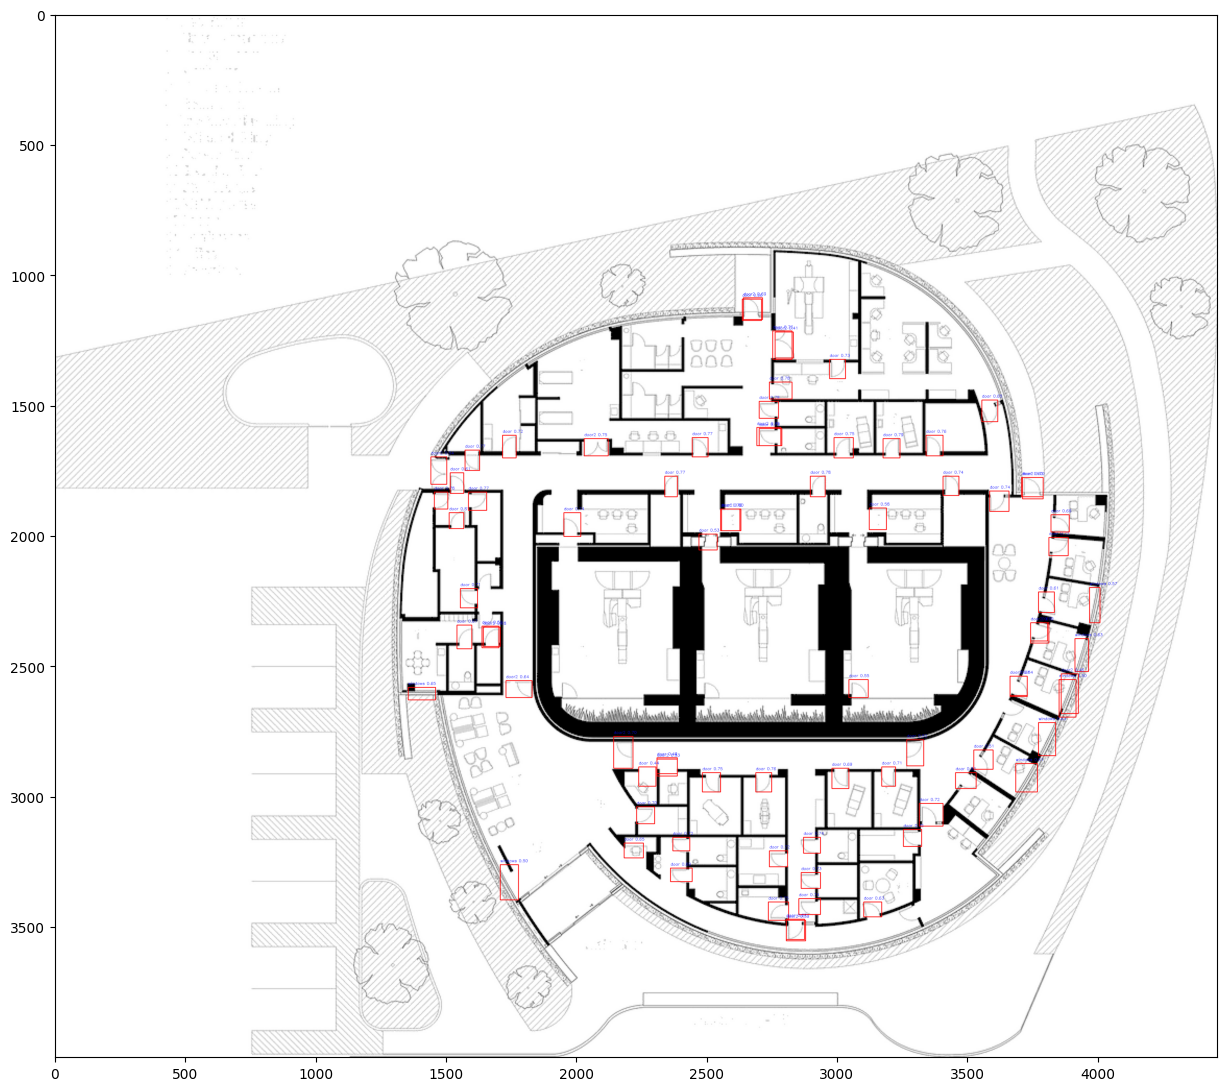

In [3]:
# your_image = 'assets/images/floor_plan_1.jpg'
# your_image = 'assets/images/hospital_1_black.jpg'
# your_image = 'assets/images/hospital_1_mask_upscaled.jpg'
your_image = 'assets/images/hospital_1_upscaled_sharpened.jpg'



CLIENT = InferenceHTTPClient(
    api_url="https://outline.roboflow.com",
    api_key="mQL45QHB1lZ19v2mKuf1"
)

# results = CLIENT.infer(your_image, model_id="full-set-menu/5")
results = CLIENT.infer(your_image, model_id="doors-windows-detection/4")

orig_image = cv2.imread(your_image)

# Convert the image from BGR to RGB
img = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

# Plot the predicted results
for prediction in results['predictions']:
    # example of box: {'x': 252.5, 'y': 431.5, 'width': 23.0, 'height': 27.0, 'confidence': 0.9059154391288757, 'class': 'door', 'class_id': 0, 'detection_id': '6f2b0c12-51f0-47f2-afe3-7a0a5897bc82'}

    x1 = int(prediction['x'] - prediction['width'] / 2)
    y1 = int(prediction['y'] - prediction['height'] / 2)
    x2 = int(prediction['x'] + prediction['width'] / 2)
    y2 = int(prediction['y'] + prediction['height'] / 2)

    label = f"{prediction['class']} {prediction['confidence']:.2f}"

    # Draw the bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Draw the label
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Plot the image with bounding boxes
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.show()

In [250]:
# create a set of categories
categories = set([prediction['class'] for prediction in results['predictions']])
for category in categories:
    print(category)

MEETING-TABLE
PRIVATE-DESK
WASHBASIN
WINDOW
TOILET
SINK
DOOR-SINGLE
STORAGE
ROUND-TABLE
DOOR-DOUBLE


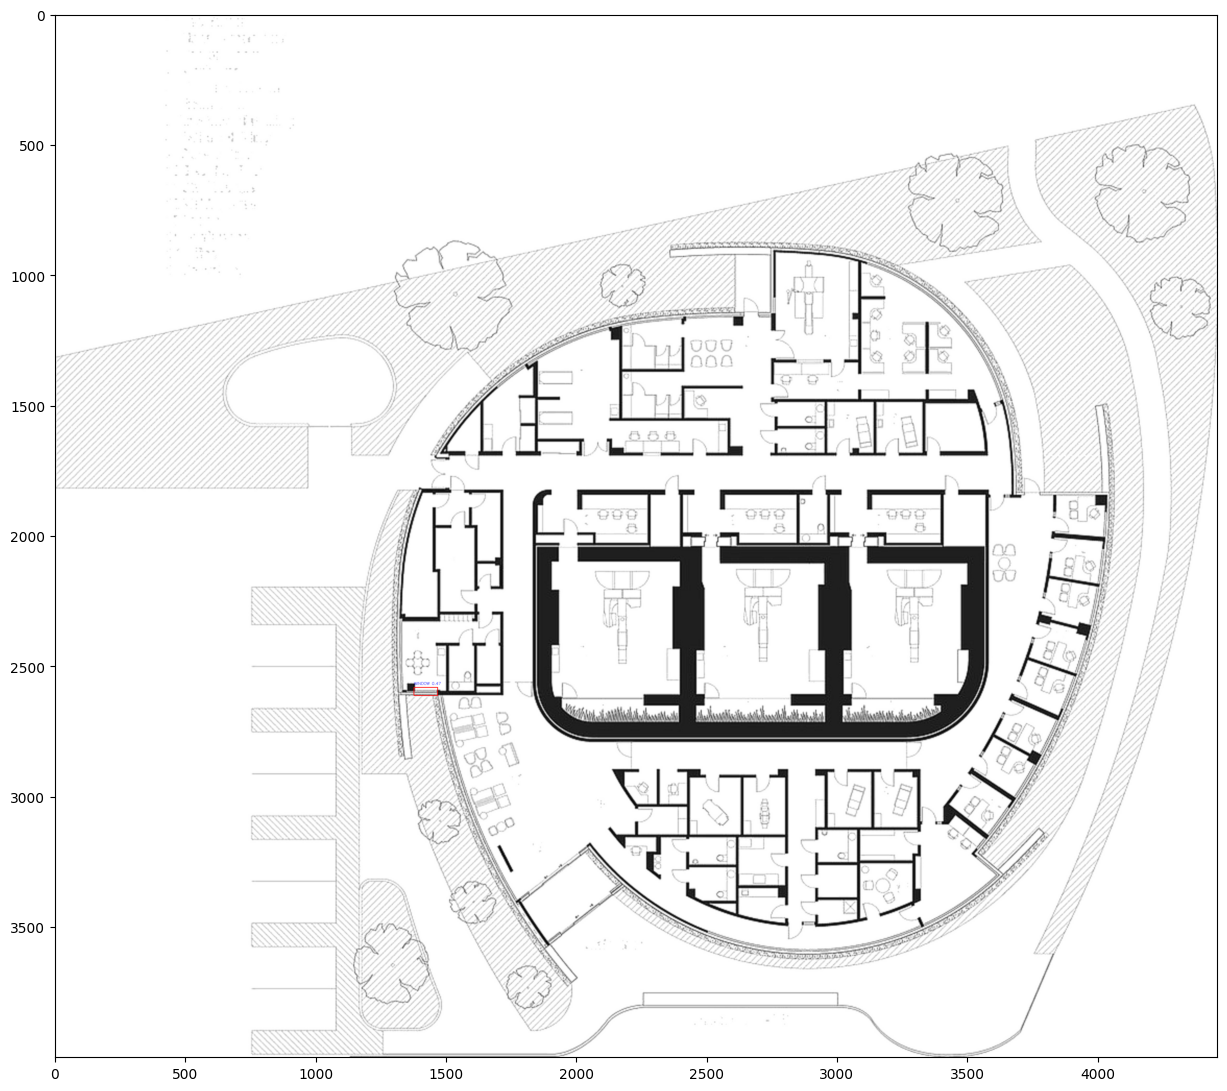

In [251]:
# Convert the image from BGR to RGB
img = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

# keep single doors
for prediction in results['predictions']:
    #if prediction['class'] == 'DOOR-SINGLE' or prediction['class'] == 'DOOR-DOUBLE':
    # if prediction['class'] == 'DOOR-DOUBLE':
    if prediction['class'] == 'WINDOW':
    # if prediction['class'] == 'door2':
        # keep only predictions with confidence > 0.75
        # if prediction['confidence'] < 0.75:
        #     break

        # example of box: {'x': 252.5, 'y': 431.5, 'width': 23.0, 'height': 27.0, 'confidence': 0.9059154391288757, 'class': 'door', 'class_id': 0, 'detection_id': '6f2b0c12-51f0-47f2-afe3-7a0a5897bc82'}

        x1 = int(prediction['x'] - prediction['width'] / 2)
        y1 = int(prediction['y'] - prediction['height'] / 2)
        x2 = int(prediction['x'] + prediction['width'] / 2)
        y2 = int(prediction['y'] + prediction['height'] / 2)

        label = f"{prediction['class']} {prediction['confidence']:.2f}"

        # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Draw the label
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Plot the image with bounding boxes
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.show()

In [47]:
def highlight_range(image, min, max):
    # gray to hsv
    bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

    in_range = cv2.inRange(image, min, max)
    
    # hue = 0 (red)
    hsv[..., 0] = 0

    # perform bitwise or
    hsv[..., 1] = cv2.bitwise_or(hsv[..., 1], in_range)
    hsv[..., 2] = cv2.bitwise_or(hsv[..., 2], in_range)

    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    
    return rgb

In [4]:
# filter predictions by class
doors = [prediction for prediction in results['predictions'] if prediction['class'] == 'door' and prediction['confidence'] > 0.5]
doors2 = [prediction for prediction in results['predictions'] if prediction['class'] == 'door2' and prediction['confidence'] > 0.5]

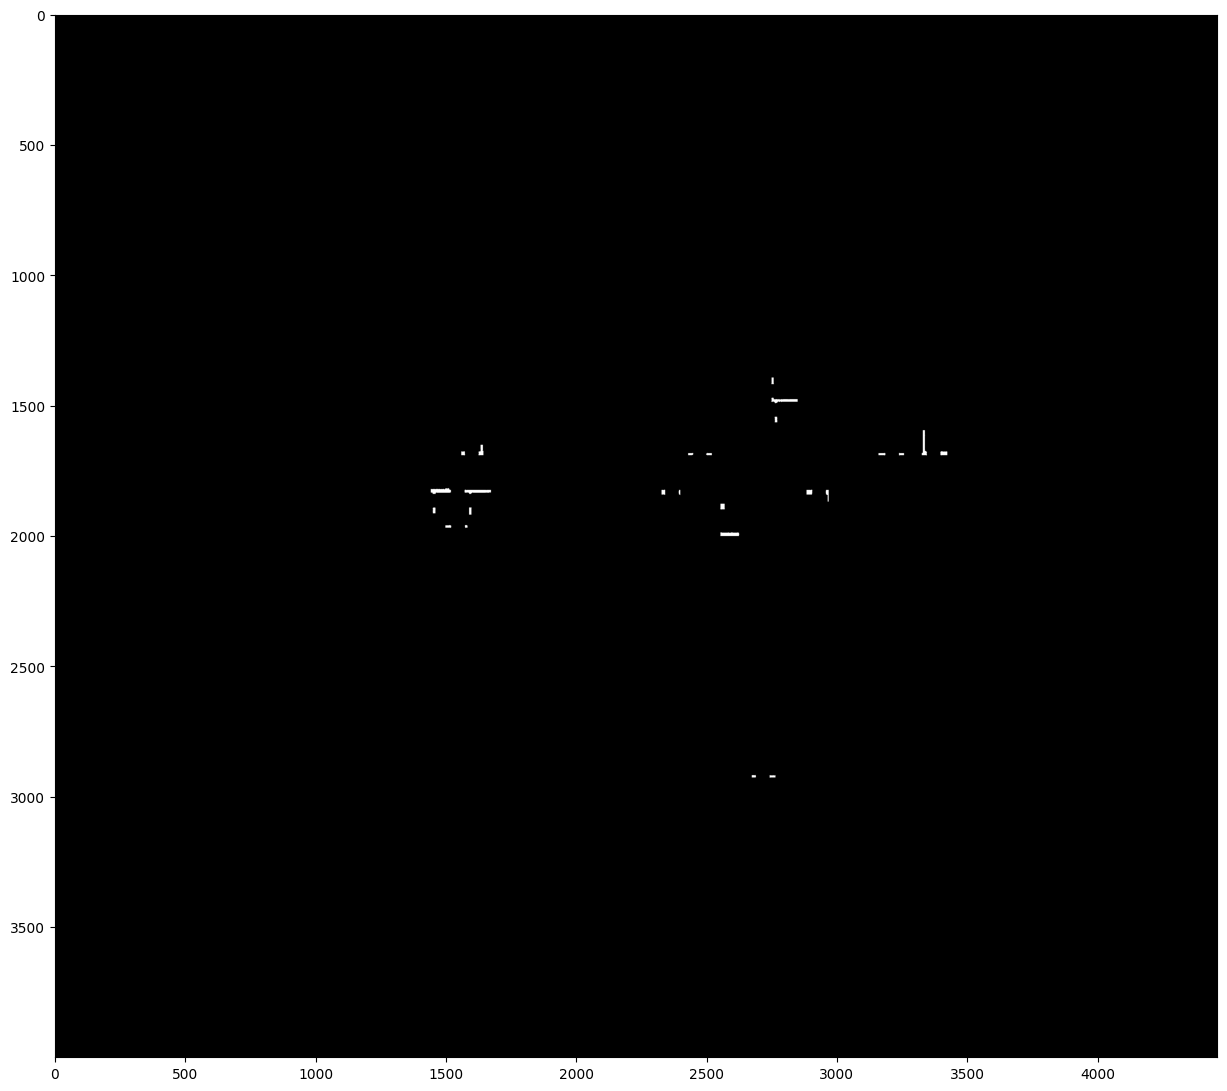

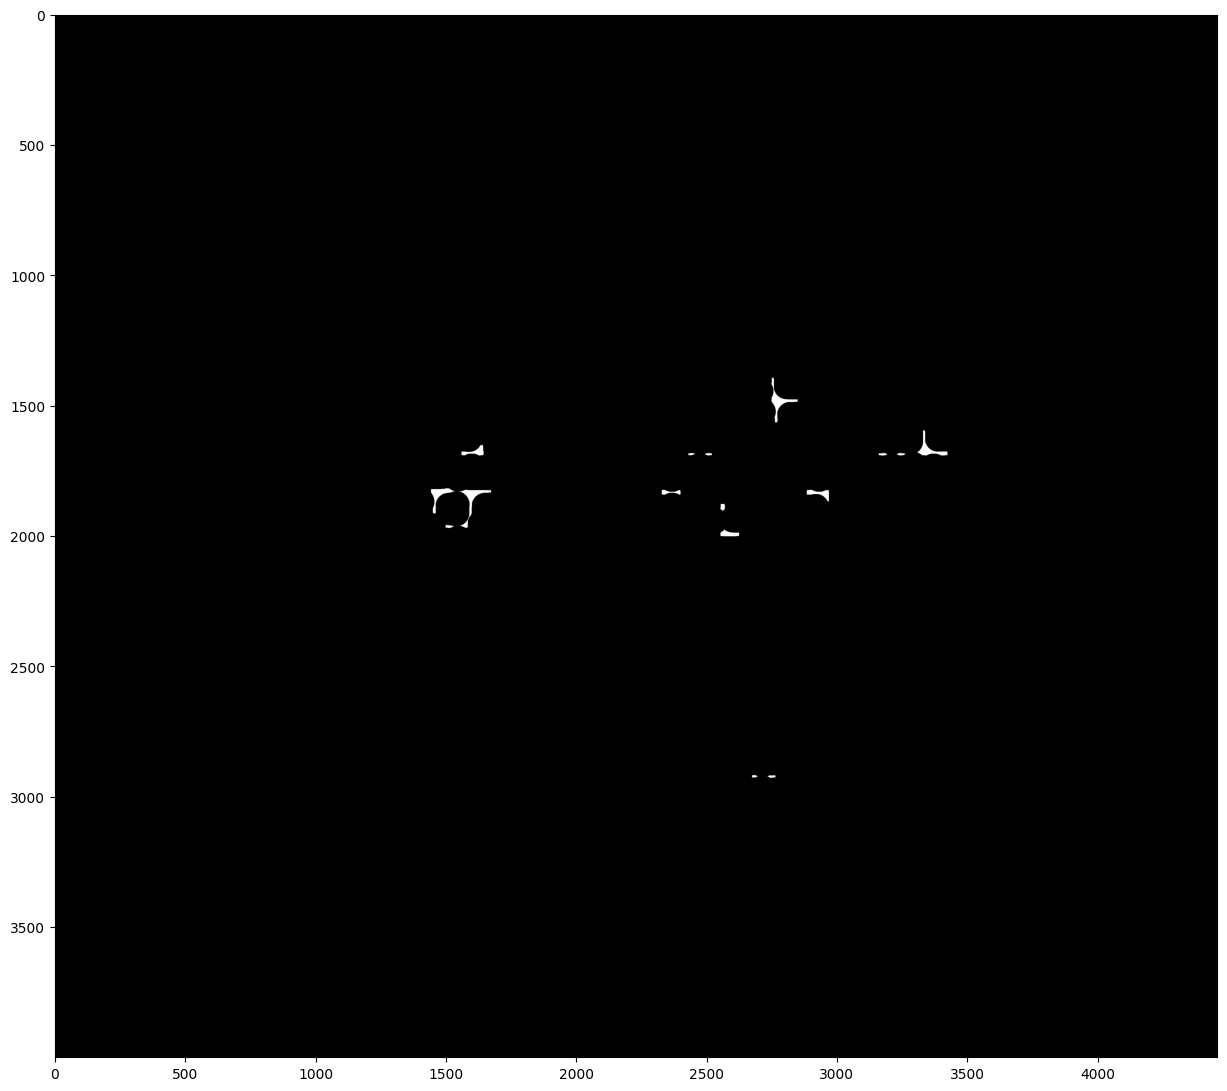

In [5]:
img = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)

factor = 1.5

# create an image-like array with the same shape as the original image
mask = np.zeros((orig_image.shape[0], orig_image.shape[1]), dtype=np.uint8)

for i in range(len(doors2)):
    x1 = int(doors[i]['x'] - factor * doors[i]['width'] / 2)
    y1 = int(doors[i]['y'] - factor * doors[i]['height'] / 2)
    x2 = int(doors[i]['x'] + factor * doors[i]['width'] / 2)
    y2 = int(doors[i]['y'] + factor * doors[i]['height'] / 2)

    mask[y1:y2, x1:x2] = 255

# bitwize and
doors_mask = cv2.bitwise_and(img, mask)

inv_mask = cv2.bitwise_not(mask)
doors_mask = cv2.bitwise_or(doors_mask, inv_mask)

filters = [
    in_range(0, 80)
]
walls = apply_filters(doors_mask, filters)

# plot the mask
plt.figure(figsize=(15, 15))
plt.imshow(walls, cmap='gray')
plt.show()

filters = [
    morph_close(kernel(100)),
]
doors_mask = apply_filters(walls, filters)

# plot the mask
plt.figure(figsize=(15, 15))
plt.imshow(doors_mask, cmap='gray')
plt.show()

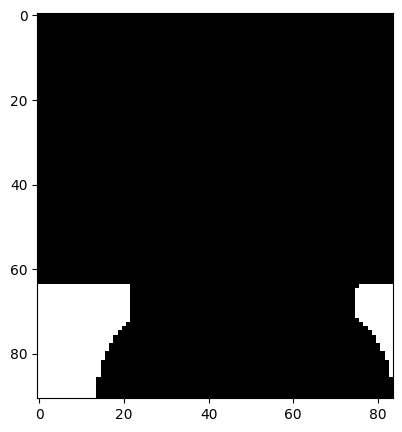

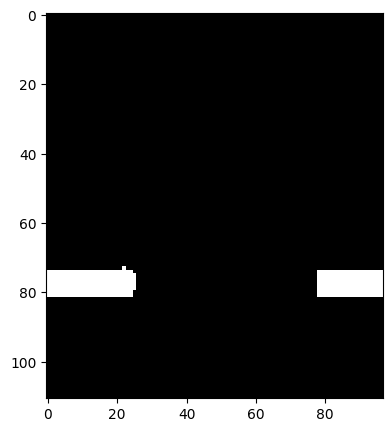

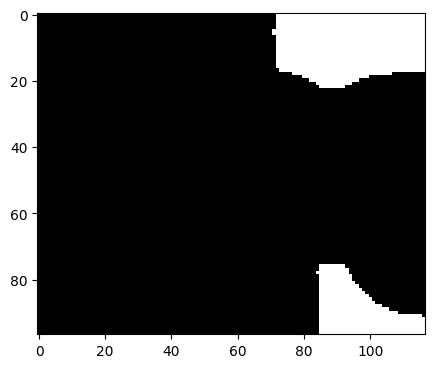

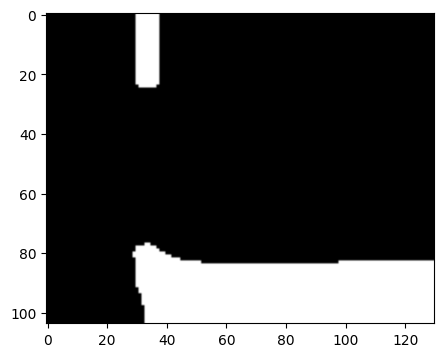

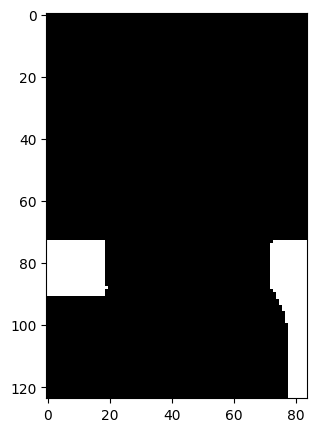

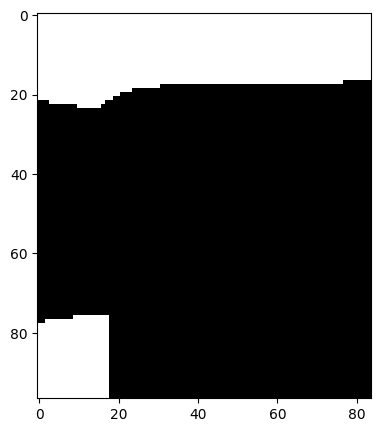

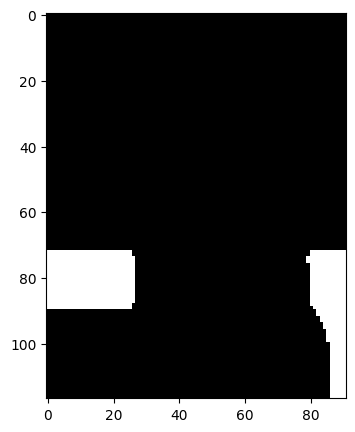

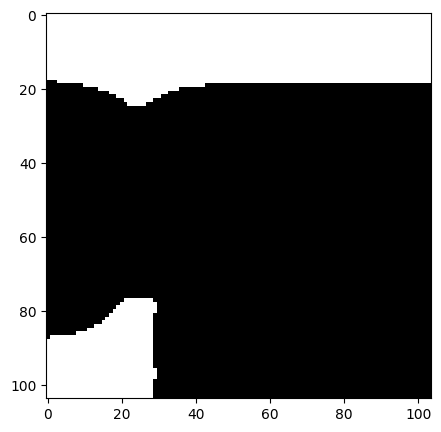

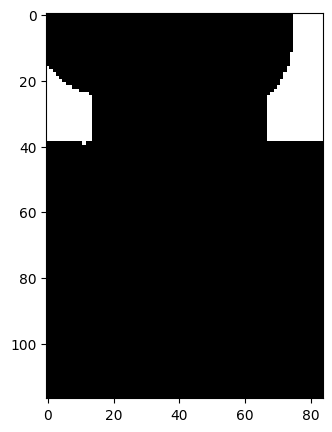

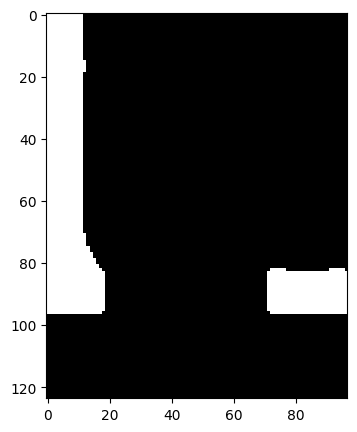

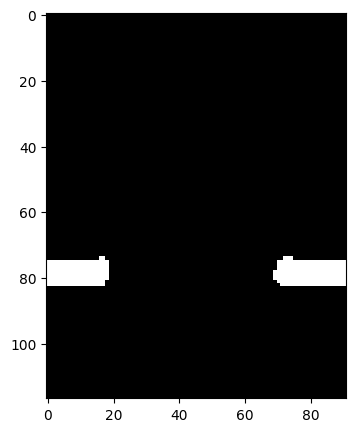

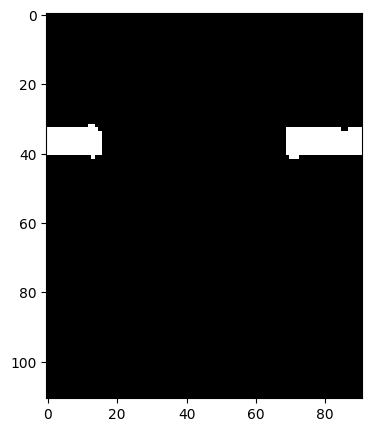

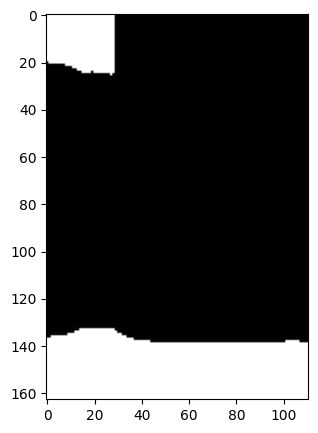

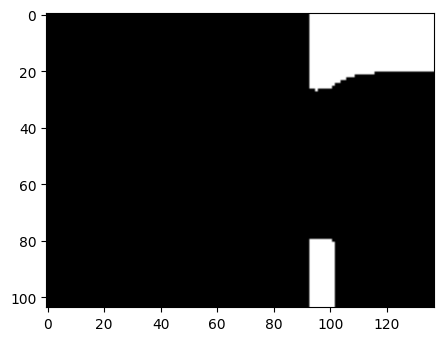

In [ ]:
factor = 1.5
for i in range(len(doors)):
    prediction = doors[i]

    # Convert the image from BGR to RGB
    img = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)

    pred_x = prediction['x']
    pred_y = prediction['y']
    pred_width = prediction['width']
    pred_height = prediction['height']

    pred_width = int(factor * pred_width)
    pred_height = int(factor * pred_height)

    x1 = int(pred_x - pred_width / 2)
    y1 = int(pred_y - pred_height / 2)
    x2 = int(pred_x + pred_width / 2)
    y2 = int(pred_y + pred_height / 2)

    # crop the door

    door_orig = img[y1:y2, x1:x2]

    sharpening_kernel = np.array(
        [[0, 0, -1, 0, 0],
        [0, -1, -2, -1, 0],
        [-1, -2, 17, -2, -1],
        [0, -1, -2, -1, 0],
        [0, 0, -1, 0, 0]]
        )

    # door_orig = cv2.filter2D(door_orig, -1, sharpening_kernel)
    door = door_orig

    filters = [
        # morph_close(kernel(7)),
        in_range(0, 80),
        morph_close(kernel(51)),
        # morph_dilate(kernel(3))
    ]
    door = apply_filters(door, filters)

    # get contours
    contours, _ = cv2.findContours(door, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # high_image = highlight_range(door, 0, 80)

    # # plot image
    # figure = plt.figure(figsize=(5, 5))
    # plt.imshow(high_image)
    # plt.show()

    # Plot the image with bounding boxes
    plt.figure(figsize=(5, 5))
    plt.imshow(door, cmap='gray')
    plt.show()

In [8]:
image_upscale = 'assets/images/hospital_1_upscaled_sharpened.jpg'

image_upscale = cv2.imread(image_upscale, cv2.IMREAD_GRAYSCALE)

def predict_class(image, classes):
    """
    A function that predicts the class of an image using a trained model
    """
    CLIENT = InferenceHTTPClient(
        api_url="https://outline.roboflow.com",
        api_key="mQL45QHB1lZ19v2mKuf1"
    )

    # results = CLIENT.infer(your_image, model_id="full-set-menu/5")
    predictions = CLIENT.infer(image, model_id="doors-windows-detection/4")['predictions']

    # Filter the predictions to get the classes
    classes = [p for p in predictions if p['class'] in classes]

    return classes

doors = predict_class(image_upscale, ['door'])
doors2 = predict_class(image_upscale, ['door2'])

In [10]:
def highlight_mask(image, mask):
    # gray to hsv
    bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    
    # hue = 0 (red)
    hsv[..., 0] = 0

    # perform bitwise or
    hsv[..., 1] = cv2.bitwise_or(hsv[..., 1], mask)
    hsv[..., 2] = cv2.bitwise_or(hsv[..., 2], mask)

    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    
    return rgb

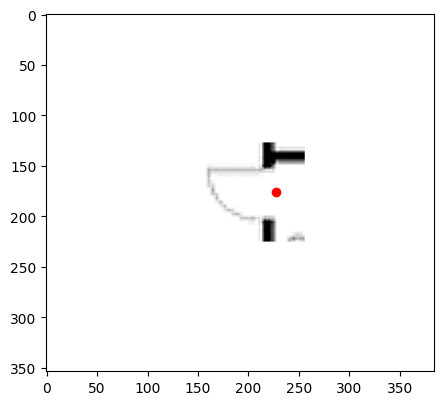

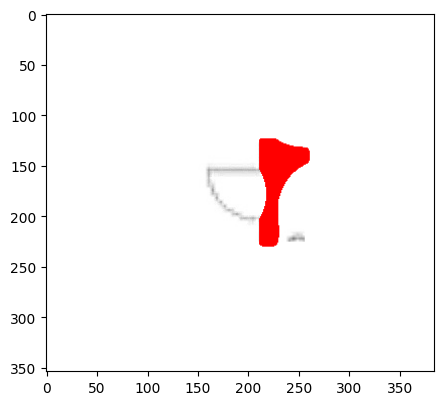

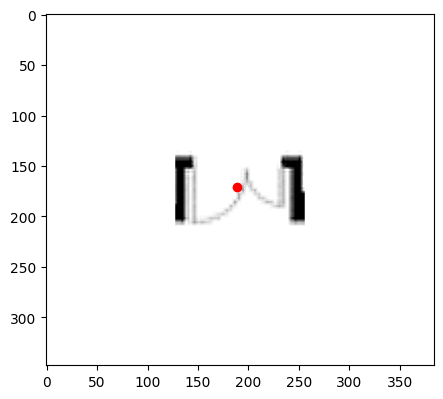

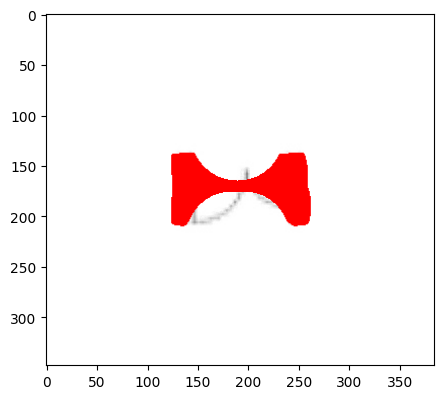

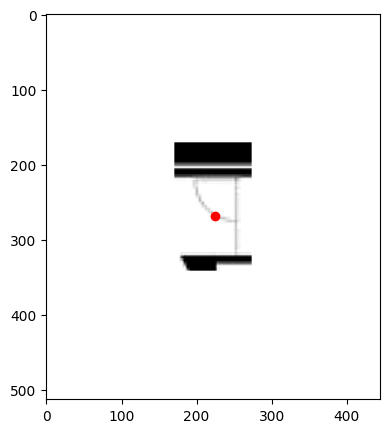

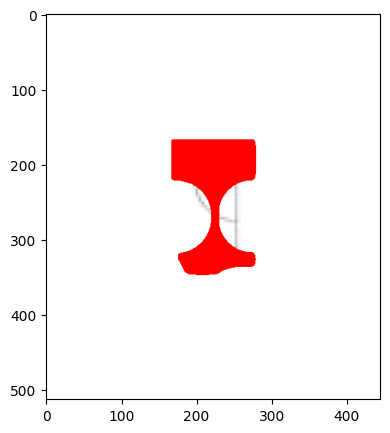

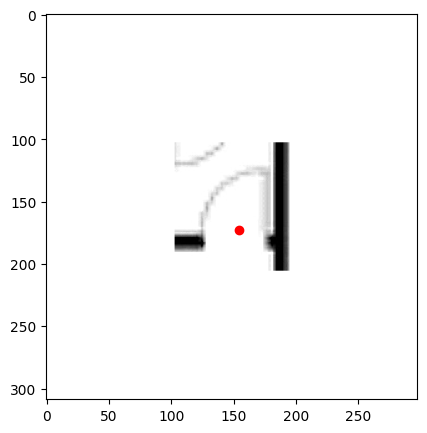

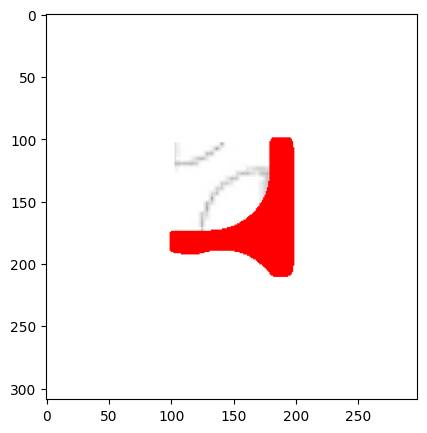

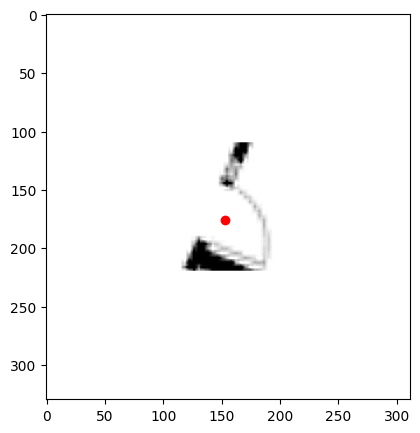

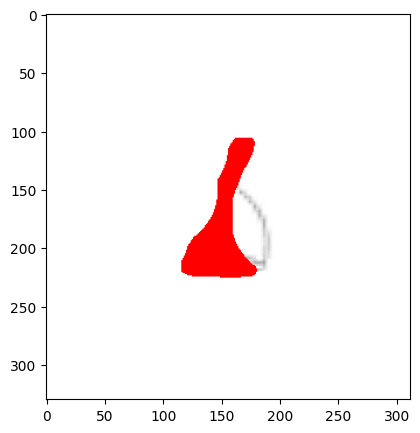

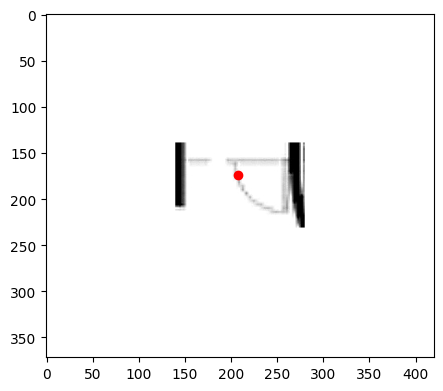

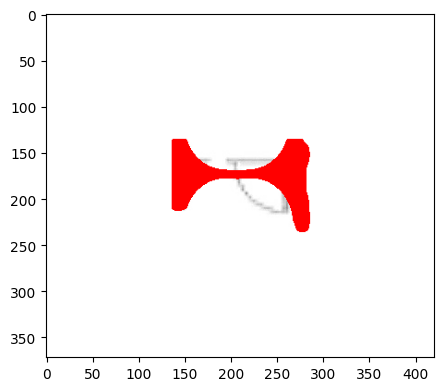

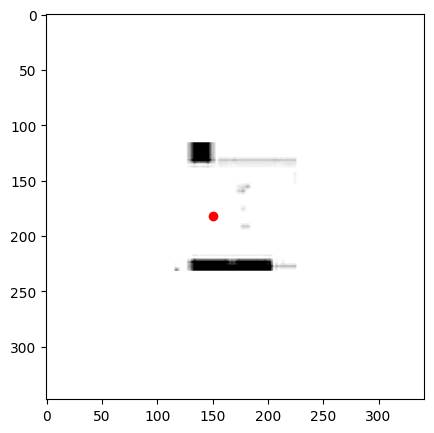

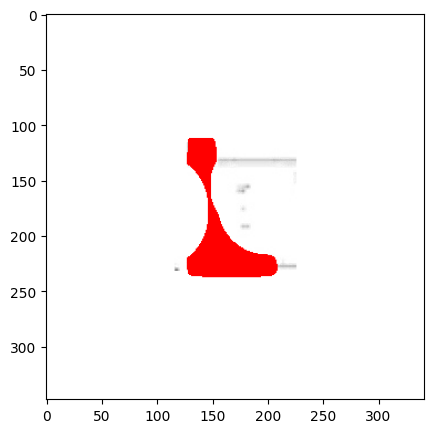

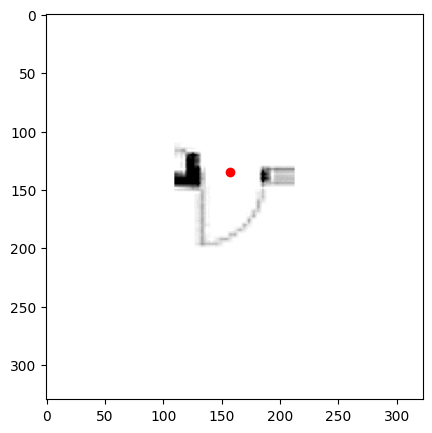

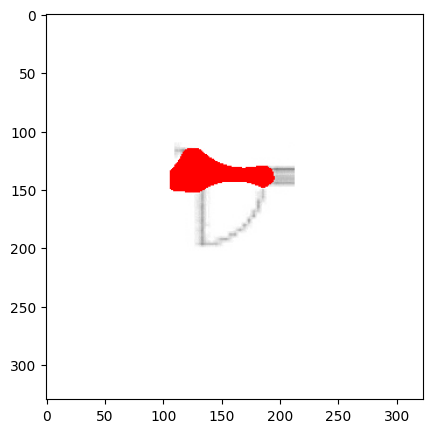

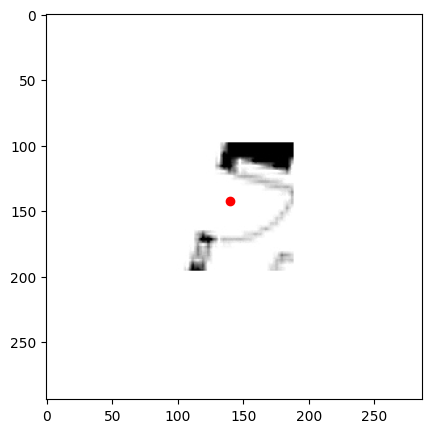

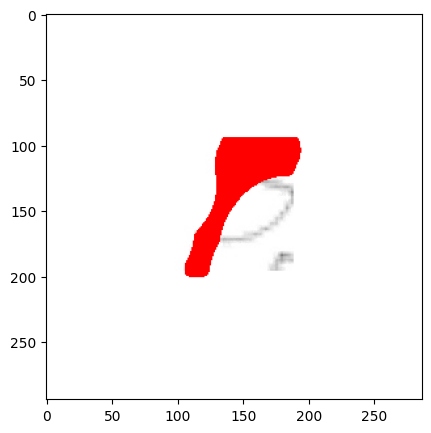

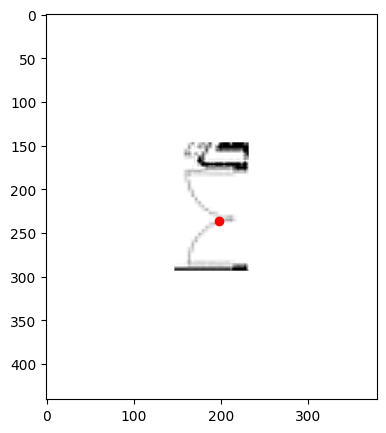

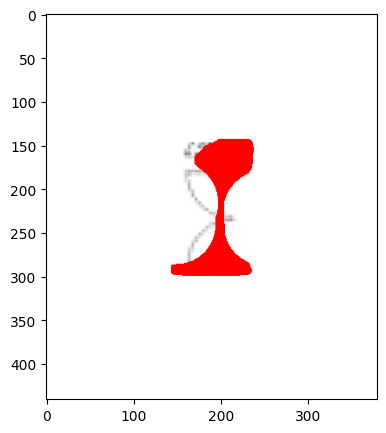

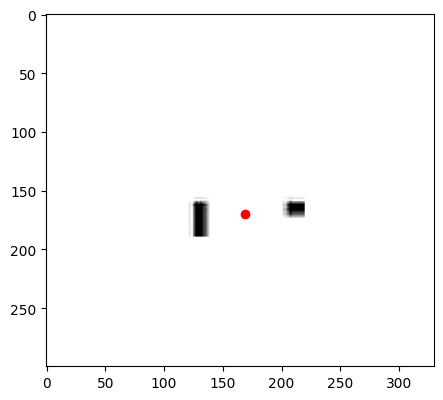

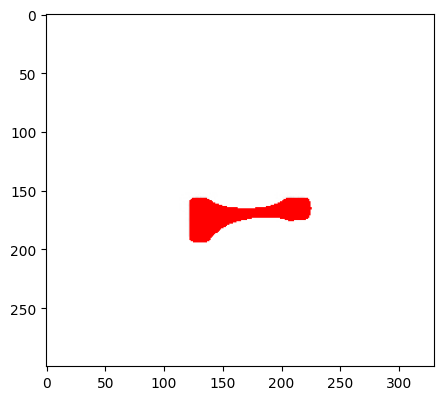

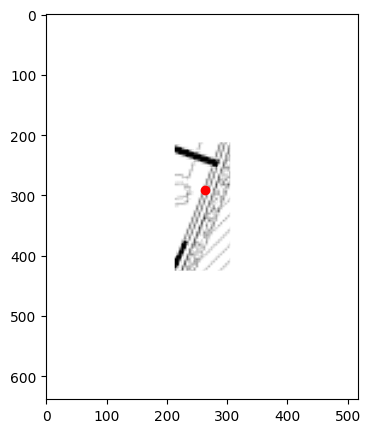

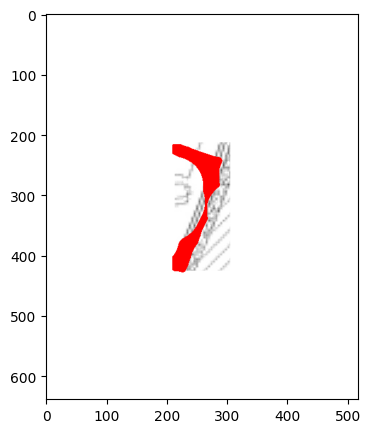

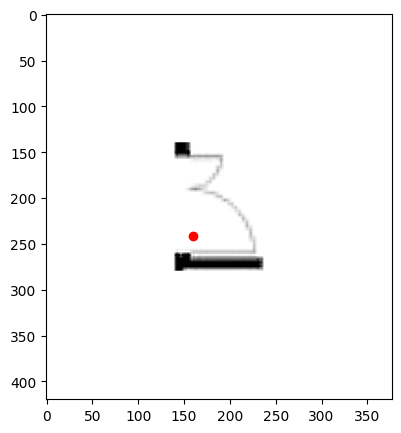

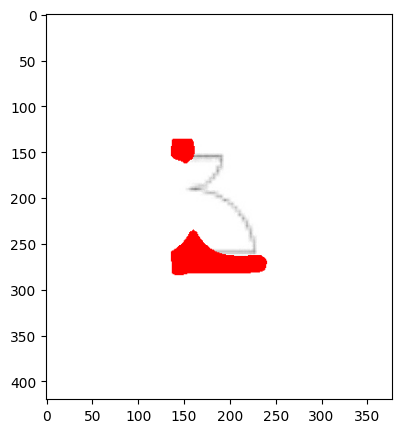

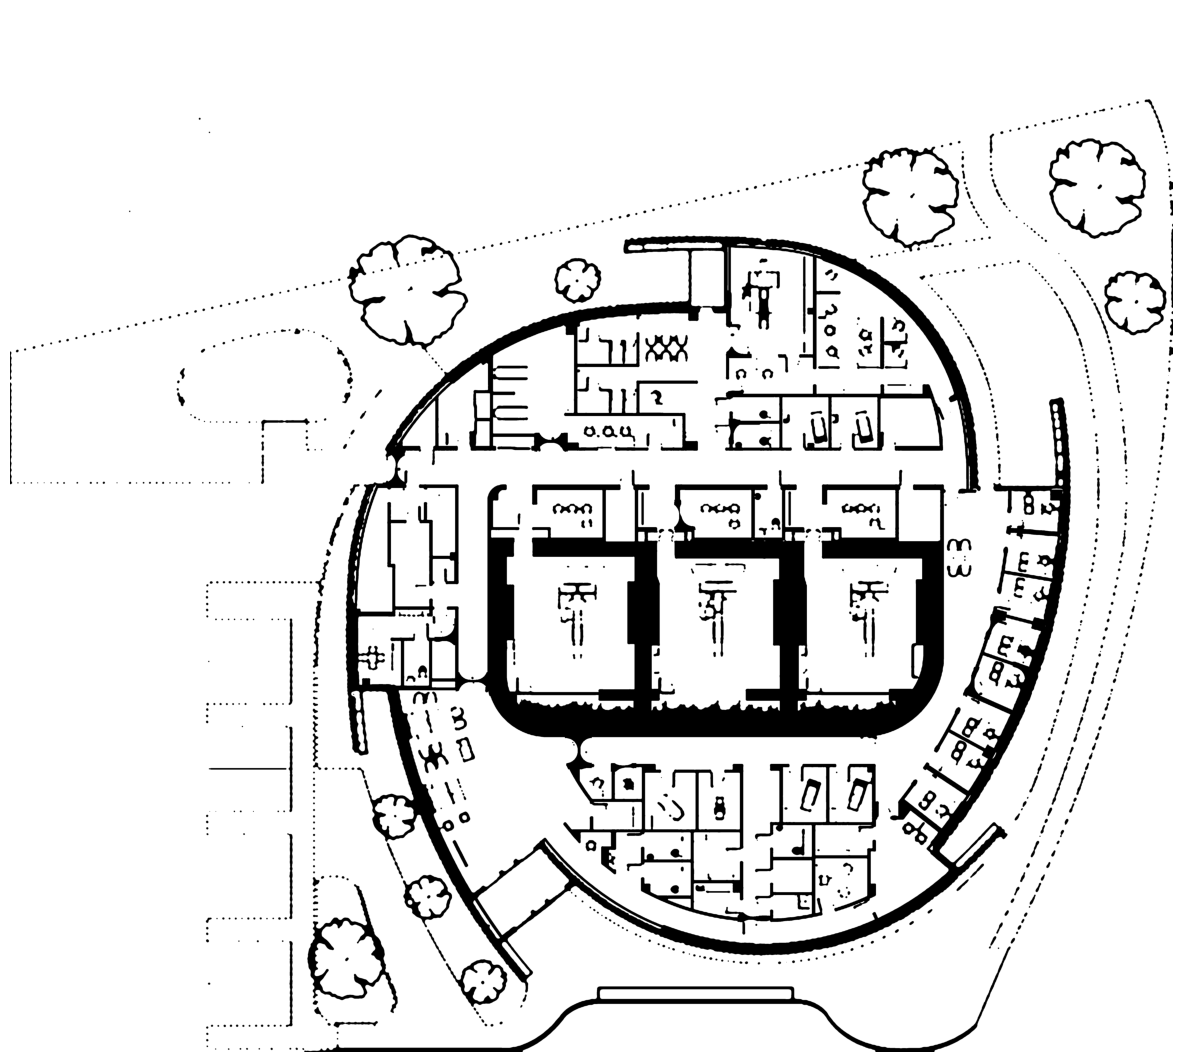

In [26]:
factor = 1.4
image_zero = np.zeros((image_upscale.shape[0], image_upscale.shape[1]), dtype=np.uint8)
for i, door in enumerate(doors2):
    # if i != 1:
    #     continue
    # print(i)
    x, y, width, height = door['x'], door['y'], door['width'], door['height']

    x1 = int(x - width * factor / 2)
    y1 = int(y - height * factor / 2)
    x2 = int(x + width * factor / 2)
    y2 = int(y + height * factor / 2)

    image = image_upscale[y1:y2, x1:x2]

    # Add margin to the image
    margin = max(x2-x1, y2-y1)

    image = cv2.copyMakeBorder(image, margin, margin, margin, margin, cv2.BORDER_CONSTANT, value=255)

    # # plot the mask
    # plt.figure(figsize=(5, 5))
    # plt.imshow(image, cmap='gray')
    # plt.show()

    door = apply_filters(image, [in_range(0, 80)])
    door_open = apply_filters(door, [morph_dilate(kernel(140)), morph_erode(kernel(120))])
    door_xor = cv2.bitwise_xor(door, door_open)
    filters = [
        morph_dilate(kernel(30)),
        invert
    ]
    door_dilated = apply_filters(door, filters)

    door_final = cv2.bitwise_and(door_open, door_dilated)

    contour = cv2.findContours(door_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    try:
        # keep the contour with the largest area
        contour = max(contour[0], key=cv2.contourArea)

        # find the center of the contour
        M = cv2.moments(contour)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

        # draw the center to the image
        plt.figure(figsize=(5, 5))
        plt.imshow(image, cmap='gray')
        plt.scatter(cx, cy, color='red')
        plt.show()

        # draw center on the image
        img = image.copy()
        # cv2.circle(img, (cx, cy), 1, 0, -1)
        img[cy, cx] = 0

        door2 = apply_filters(img, [in_range(0, 80)])
        door_open2 = apply_filters(door2, [morph_dilate(kernel(100)), morph_erode(kernel(90))])
        door_xor2 = cv2.bitwise_xor(door2, door_open2)
        filters = [
            # morph_dilate(kernel(15)),
            invert
        ]
        door_dilated2 = apply_filters(door, filters)

        door_final2 = cv2.bitwise_and(door_open2, door_dilated2)

        image_high = highlight_mask(image, door_open2)

        # plot the mask
        plt.figure(figsize=(5, 5))
        plt.imshow(image_high)
        plt.show()

        image_zero[y1:y2, x1:x2] = door_open2[margin:-margin, margin:-margin]


    except:
        # print('No contour found')
        pass

    # # plot the mask
    # plt.figure(figsize=(5, 5))
    # plt.imshow(image_high)
    # plt.show()


walls = cv2.imread('assets/images/hospital_1_walls.jpg', cv2.IMREAD_GRAYSCALE)
image_closed_doors = cv2.bitwise_and(walls, cv2.bitwise_not(image_zero))

# plot the mask
plt.figure(figsize=(15, 15))
plt.imshow(image_closed_doors, cmap='gray')
plt.axis('off')
plt.show()